<a href="https://colab.research.google.com/github/SudhanshuRajput-mac/project/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [70]:
!git clone https://github.com/SudhanshuRajput-mac/project

fatal: destination path 'project' already exists and is not an empty directory.


In [71]:
df = pd.read_csv('/content/project/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA

In [72]:
df.shape

(1338, 7)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [74]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [75]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [76]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

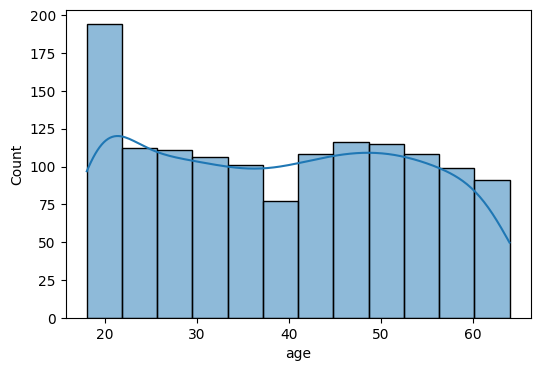

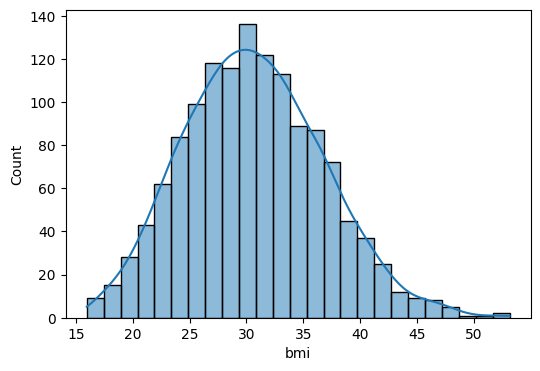

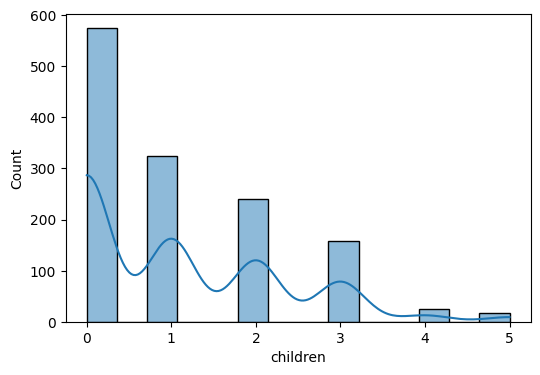

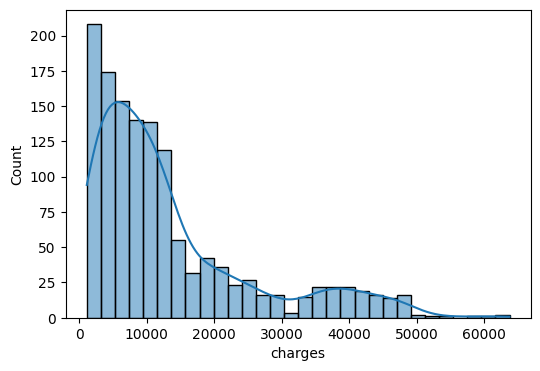

In [77]:
numeric_coloumn = ['age' , 'bmi' , 'children' , 'charges']
for col in numeric_coloumn:
  plt.figure(figsize = (6,4))
  sns.histplot(df[col] , kde = True)

<Axes: xlabel='children', ylabel='count'>

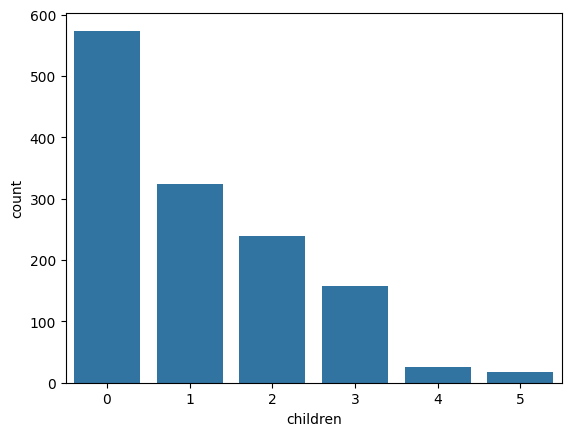

In [78]:
sns.countplot(x = df['children'])

<Axes: xlabel='sex', ylabel='count'>

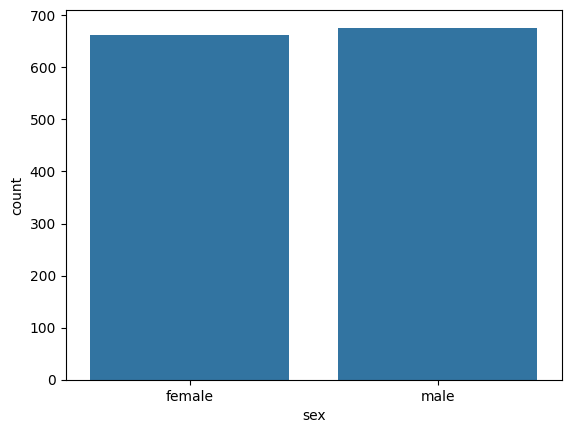

In [79]:
sns.countplot(x = df['sex'])

<Axes: xlabel='region', ylabel='count'>

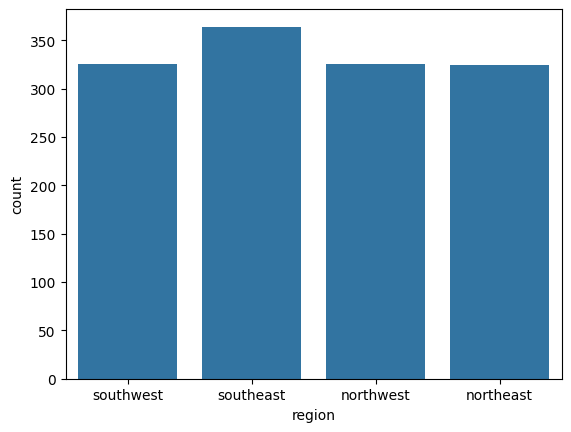

In [80]:
sns.countplot(x = df['region'])

<Axes: xlabel='smoker', ylabel='count'>

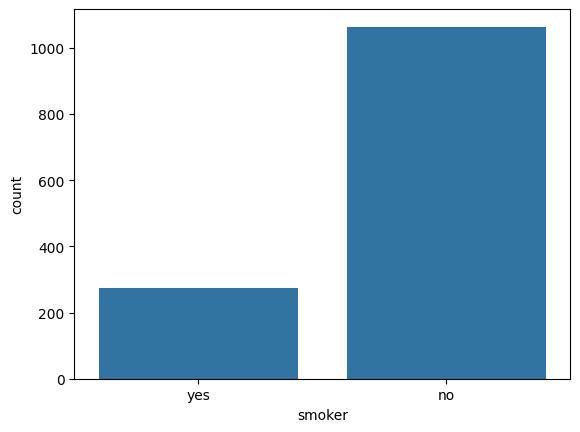

In [81]:
sns.countplot(x = df['smoker'])

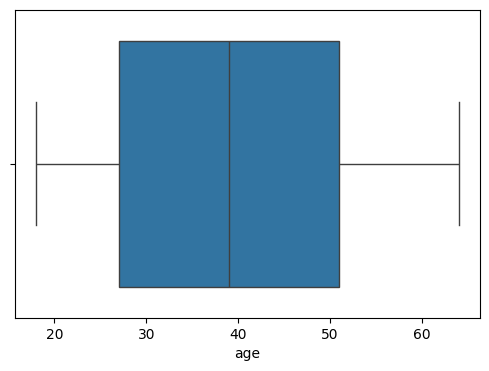

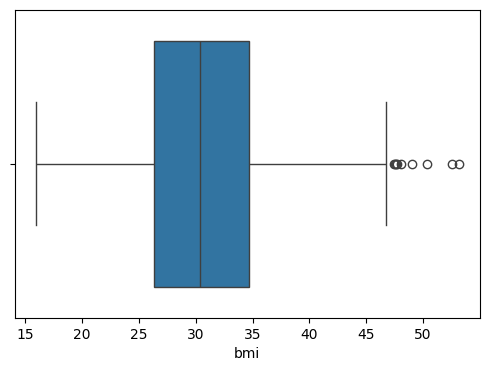

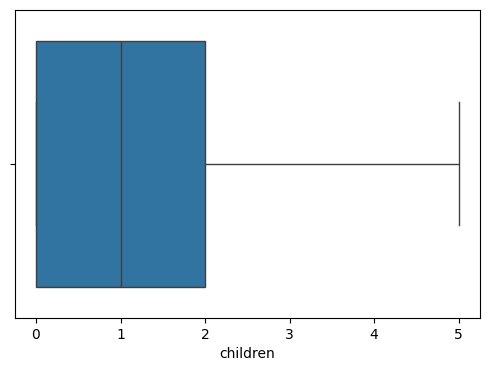

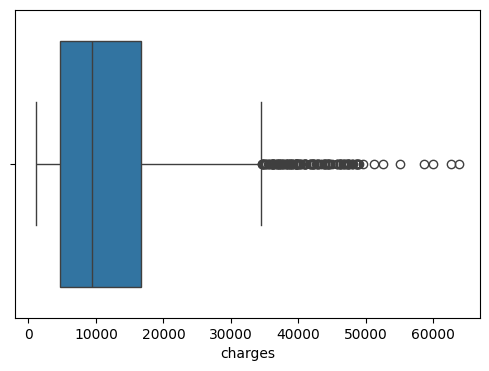

In [82]:
for col in numeric_coloumn:
  plt.figure(figsize = (6,4))
  sns.boxplot(x = df[col])

<Axes: >

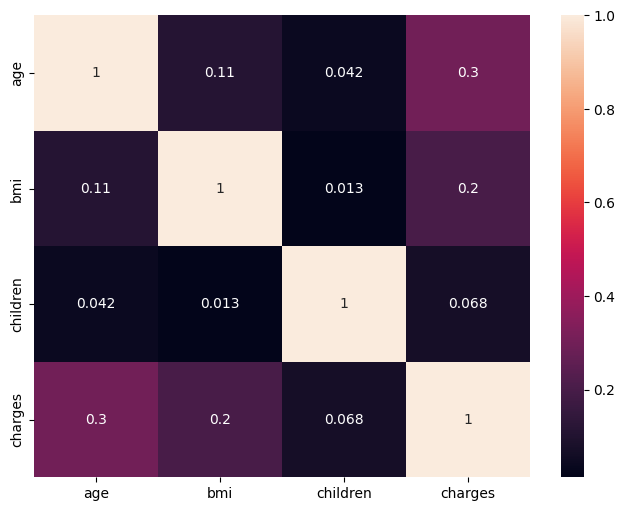

In [83]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(numeric_only=True) , annot=True)

# Data cleaning and Data preprocessing

In [84]:
# since the data is allready cleaned

In [85]:
df_cleaned = df.copy()

In [86]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
df_cleaned.shape

(1338, 7)

In [88]:
df_cleaned.drop_duplicates(inplace = True)

In [89]:
df_cleaned.shape

(1337, 7)

In [90]:
df_cleaned.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [91]:
# converting categorical column into numeric

In [92]:
df_cleaned['sex'].value_counts()

,count
sex,
male,675
female,662


In [93]:
# label encoding  for sex

In [94]:
# df_cleaned['sex'].replace({'male' : 0 , 'female' : 1} , inplace = True)
# OR
df_cleaned['sex'] = df_cleaned['sex'].map({'male' : 0 , 'female'  : 1})

In [95]:
df_cleaned

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,yes,southwest,16884.92400
1,18,0,33.770,1,no,southeast,1725.55230
2,28,0,33.000,3,no,southeast,4449.46200
3,33,0,22.705,0,no,northwest,21984.47061
4,32,0,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,no,northwest,10600.54830
1334,18,1,31.920,0,no,northeast,2205.98080
1335,18,1,36.850,0,no,southeast,1629.83350
1336,21,1,25.800,0,no,southwest,2007.94500


In [96]:
df_cleaned['smoker'].value_counts()

,count
smoker,
no,1063
yes,274


In [97]:
df_cleaned['smoker'] = df_cleaned['smoker'].map({'yes' : 1 , 'no' : 0})

In [98]:
df_cleaned.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [99]:
df_cleaned.rename(columns={
    'sex' : 'is_female',
    'smoker' : 'is_smoker'
} , inplace = True)

In [100]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,region,charges
0,19,1,27.900,0,1,southwest,16884.92400
1,18,0,33.770,1,0,southeast,1725.55230
2,28,0,33.000,3,0,southeast,4449.46200
3,33,0,22.705,0,0,northwest,21984.47061
4,32,0,28.880,0,0,northwest,3866.85520


In [101]:
df_cleaned['region'].value_counts()

,count
region,
southeast,364
southwest,325
northwest,324
northeast,324


In [102]:
# one hot encoding for region as it has more than two type

In [103]:
df_cleaned = pd.get_dummies(df_cleaned , columns = ['region'])

In [104]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,False,False,False,True
1,18,0,33.770,1,0,1725.55230,False,False,True,False
2,28,0,33.000,3,0,4449.46200,False,False,True,False
3,33,0,22.705,0,0,21984.47061,False,True,False,False
4,32,0,28.880,0,0,3866.85520,False,True,False,False


In [105]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   is_female         1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   is_smoker         1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   bool   
 7   region_northwest  1337 non-null   bool   
 8   region_southeast  1337 non-null   bool   
 9   region_southwest  1337 non-null   bool   
dtypes: bool(4), float64(2), int64(4)
memory usage: 78.3 KB


In [106]:
df_cleaned[['region_northeast' , 'region_northwest' , 'region_southeast' , 'region_southwest']] = df_cleaned[['region_northeast' , 'region_northwest' , 'region_southeast' , 'region_southwest']].astype(int)

In [108]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0


# Feature engineering and Extraction

In [109]:
# creating the new column in which they are classified  based on bmi

In [110]:
df_cleaned['bmi_category'] = pd.cut(df_cleaned['bmi'] ,
    bins = [0,18.5,24.9,29.9,float('inf')],
  labels= ['Underweight' , 'Normal' ,'Overweight' ,'Obese']
                                    )

In [116]:
df_cleaned.sample(10)

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category
1030,46,1,23.655,1,1,21677.28345,0,1,0,0,Normal
1161,34,0,42.130,2,0,5124.18870,0,0,1,0,Obese
1019,21,1,32.680,2,0,26018.95052,0,1,0,0,Obese
76,29,1,29.590,1,0,3947.41310,0,0,1,0,Overweight
463,56,0,25.935,0,0,11165.41765,1,0,0,0,Overweight
623,18,0,33.535,0,1,34617.84065,1,0,0,0,Obese
978,45,1,39.995,3,0,9704.66805,1,0,0,0,Obese
77,21,0,35.530,0,0,1532.46970,0,0,1,0,Obese
1294,58,0,25.175,0,0,11931.12525,1,0,0,0,Overweight
987,45,1,27.645,1,0,28340.18885,0,1,0,0,Overweight


In [117]:
# now one hot encoding for bmi_category
df_cleaned['bmi_category'].value_counts()

,count
bmi_category,
Obese,715
Overweight,380
Normal,221
Underweight,21


In [119]:
df_cleaned = pd.get_dummies(df_cleaned , columns = ['bmi_category'])

In [121]:
df_cleaned.head(5)

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27.900,0,1,16884.92400,0,0,0,1,False,False,True,False
1,18,0,33.770,1,0,1725.55230,0,0,1,0,False,False,False,True
2,28,0,33.000,3,0,4449.46200,0,0,1,0,False,False,False,True
3,33,0,22.705,0,0,21984.47061,0,1,0,0,False,True,False,False
4,32,0,28.880,0,0,3866.85520,0,1,0,0,False,False,True,False


In [122]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1337 non-null   int64  
 1   is_female                 1337 non-null   int64  
 2   bmi                       1337 non-null   float64
 3   children                  1337 non-null   int64  
 4   is_smoker                 1337 non-null   int64  
 5   charges                   1337 non-null   float64
 6   region_northeast          1337 non-null   int64  
 7   region_northwest          1337 non-null   int64  
 8   region_southeast          1337 non-null   int64  
 9   region_southwest          1337 non-null   int64  
 10  bmi_category_Underweight  1337 non-null   bool   
 11  bmi_category_Normal       1337 non-null   bool   
 12  bmi_category_Overweight   1337 non-null   bool   
 13  bmi_category_Obese        1337 non-null   bool   
dtypes: bool(4), f

In [124]:
df_cleaned[['bmi_category_Normal' , 'bmi_category_Underweight' , 'bmi_category_Overweight' ,'bmi_category_Obese']] = df_cleaned[['bmi_category_Normal' , 'bmi_category_Underweight' , 'bmi_category_Overweight' ,'bmi_category_Obese']].astype(int)

In [125]:
df_cleaned

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,19,1,27.900,0,1,16884.92400,0,0,0,1,0,0,1,0
1,18,0,33.770,1,0,1725.55230,0,0,1,0,0,0,0,1
2,28,0,33.000,3,0,4449.46200,0,0,1,0,0,0,0,1
3,33,0,22.705,0,0,21984.47061,0,1,0,0,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0,0,0,0,1
1334,18,1,31.920,0,0,2205.98080,1,0,0,0,0,0,0,1
1335,18,1,36.850,0,0,1629.83350,0,0,1,0,0,0,0,1
1336,21,1,25.800,0,0,2007.94500,0,0,0,1,0,0,1,0


In [126]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       1337 non-null   int64  
 1   is_female                 1337 non-null   int64  
 2   bmi                       1337 non-null   float64
 3   children                  1337 non-null   int64  
 4   is_smoker                 1337 non-null   int64  
 5   charges                   1337 non-null   float64
 6   region_northeast          1337 non-null   int64  
 7   region_northwest          1337 non-null   int64  
 8   region_southeast          1337 non-null   int64  
 9   region_southwest          1337 non-null   int64  
 10  bmi_category_Underweight  1337 non-null   int64  
 11  bmi_category_Normal       1337 non-null   int64  
 12  bmi_category_Overweight   1337 non-null   int64  
 13  bmi_category_Obese        1337 non-null   int64  
dtypes: float64(2)

In [127]:
df_cleaned.columns

Index(['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges',
       'region_northeast', 'region_northwest', 'region_southeast',
       'region_southwest', 'bmi_category_Underweight', 'bmi_category_Normal',
       'bmi_category_Overweight', 'bmi_category_Obese'],
      dtype='object')

In [128]:
from sklearn.preprocessing import StandardScaler
cols = ['age' , 'bmi' ,'children']
scaler = StandardScaler()

df_cleaned[cols] = scaler.fit_transform(df_cleaned[cols])

In [129]:
df_cleaned.head()

,age,is_female,bmi,children,is_smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,bmi_category_Underweight,bmi_category_Normal,bmi_category_Overweight,bmi_category_Obese
0,-1.440418,1,-0.453160,-0.909234,1,16884.92400,0,0,0,1,0,0,1,0
1,-1.511647,0,0.509422,-0.079442,0,1725.55230,0,0,1,0,0,0,0,1
2,-0.799350,0,0.383155,1.580143,0,4449.46200,0,0,1,0,0,0,0,1
3,-0.443201,0,-1.305052,-0.909234,0,21984.47061,0,1,0,0,0,1,0,0
4,-0.514431,0,-0.292456,-0.909234,0,3866.85520,0,1,0,0,0,0,1,0


<Axes: >

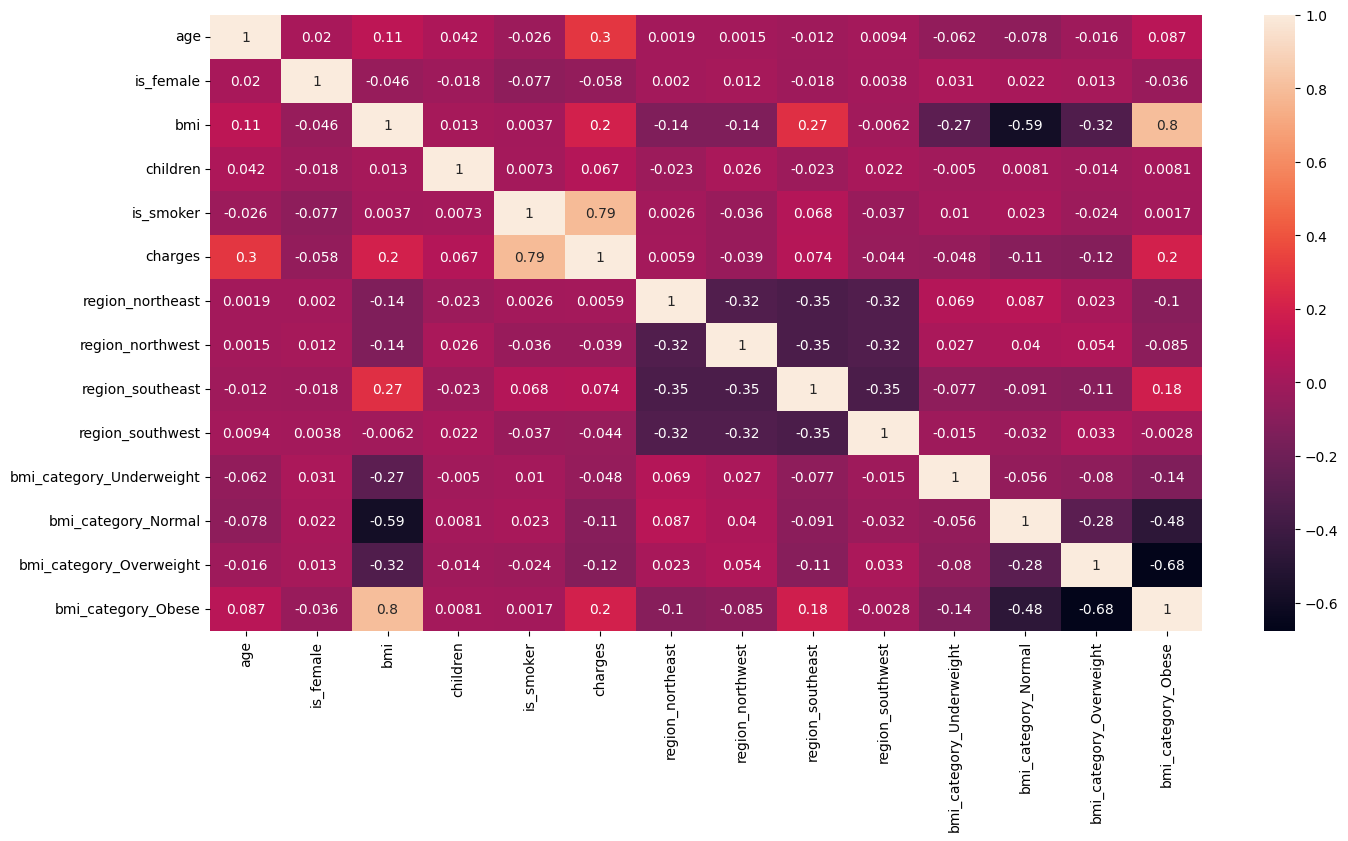

In [131]:
plt.figure(figsize = (16,8))
sns.heatmap(df_cleaned.corr(numeric_only=True) , annot=True)

- heatmap also give the corelation b/w different columns

In [133]:
from scipy.stats import pearsonr

# ----------------------------------
# Pearson Correlation Calculation
# ----------------------------------

# List of features to check against target
selected_features = [
    'age', 'bmi', 'children', 'is_female', 'is_smoker',
    'region_northwest','region_northeast', 'region_southeast', 'region_southwest',
    'bmi_category_Normal', 'bmi_category_Overweight', 'bmi_category_Obese','bmi_category_Underweight'
]

correlations = {
    feature: pearsonr(df_cleaned[feature], df_cleaned['charges'])[0]
    for feature in selected_features
}
correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Pearson Correlation'])
correlation_df.sort_values(by='Pearson Correlation', ascending=False)

,Feature,Pearson Correlation
4,is_smoker,0.787234
0,age,0.298308
1,bmi,0.198401
11,bmi_category_Obese,0.197659
7,region_southeast,0.073578
2,children,0.067389
6,region_northeast,0.005945
5,region_northwest,-0.038695
8,region_southwest,-0.043637
12,bmi_category_Underweight,-0.048225


In [138]:
cat_features = [
    'is_female', 'is_smoker',
    'region_northwest', 'region_southeast', 'region_southwest','region_northeast' ,
    'bmi_category_Normal', 'bmi_category_Overweight','bmi_category_Underweight','bmi_category_Obese'
]

In [139]:
from scipy.stats import chi2_contingency
import pandas as pd

alpha = 0.05

df_cleaned['charges_bin'] = pd.qcut(df_cleaned['charges'], q=4, labels=False)
chi2_results = {}

for col in cat_features:
    contingency = pd.crosstab(df_cleaned[col], df_cleaned['charges_bin'])
    chi2_stat, p_val, _, _ = chi2_contingency(contingency)
    decision = 'Reject Null (Keep Feature)' if p_val < alpha else 'Accept Null (Drop Feature)'
    chi2_results[col] = {
        'chi2_statistic': chi2_stat,
        'p_value': p_val,
        'Decision': decision
    }

chi2_df = pd.DataFrame(chi2_results).T
chi2_df = chi2_df.sort_values(by='p_value')
chi2_df

,chi2_statistic,p_value,Decision
is_smoker,848.219178,0.0,Reject Null (Keep Feature)
region_southeast,15.998167,0.001135,Reject Null (Keep Feature)
is_female,10.258784,0.01649,Reject Null (Keep Feature)
bmi_category_Obese,7.654464,0.05372,Accept Null (Drop Feature)
region_northeast,6.438442,0.092122,Accept Null (Drop Feature)
region_southwest,5.091893,0.165191,Accept Null (Drop Feature)
bmi_category_Underweight,4.384749,0.222804,Accept Null (Drop Feature)
bmi_category_Normal,4.263673,0.234364,Accept Null (Drop Feature)
bmi_category_Overweight,4.201575,0.240504,Accept Null (Drop Feature)
region_northwest,1.13424,0.768815,Accept Null (Drop Feature)


In [140]:
final_df = df_cleaned[['age', 'is_female', 'bmi', 'children', 'is_smoker', 'charges','region_southeast']]

In [141]:
final_df

,age,is_female,bmi,children,is_smoker,charges,region_southeast
0,-1.440418,1,-0.453160,-0.909234,1,16884.92400,0
1,-1.511647,0,0.509422,-0.079442,0,1725.55230,1
2,-0.799350,0,0.383155,1.580143,0,4449.46200,1
3,-0.443201,0,-1.305052,-0.909234,0,21984.47061,0
4,-0.514431,0,-0.292456,-0.909234,0,3866.85520,0
...,...,...,...,...,...,...,...
1333,0.767704,0,0.050269,1.580143,0,10600.54830,0
1334,-1.511647,1,0.206053,-0.909234,0,2205.98080,0
1335,-1.511647,1,1.014490,-0.909234,0,1629.83350,1
1336,-1.297958,1,-0.797524,-0.909234,0,2007.94500,0
